In [1]:
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV

from data_prep import y_train, y_test, tf_idf_data_train, tf_idf_data_test
from visualizations import evaluate_model, confusion_matrix_heat_map

/Users/stevedye/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/stevedye/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


In [2]:
pipe = Pipeline([
    ('smote', SMOTE(random_state=0)),
    ('log', LogisticRegression(random_state=0, max_iter=1000))])

In [3]:
parameters = {'log__C':  [30],
              'log__penalty': ['l2'],
              'log__solver': ['saga'],
              'log__multi_class': ['auto']}

In [4]:
log_classifier = GridSearchCV(pipe, parameters, cv=3, n_jobs= -1)
log_classifier.fit(tf_idf_data_train, y_train)
print(log_classifier.best_estimator_)

Pipeline(memory=None,
         steps=[('smote',
                 SMOTE(k_neighbors=5, kind='deprecated',
                       m_neighbors='deprecated', n_jobs=1,
                       out_step='deprecated', random_state=0, ratio=None,
                       sampling_strategy='auto', svm_estimator='deprecated')),
                ('log',
                 LogisticRegression(C=30, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=0, solver='saga',
                                    tol=0.0001, verbose=0, warm_start=False))],
         verbose=False)


In [5]:
evaluate_model(tf_idf_data_train, y_train, tf_idf_data_test, y_test, log_classifier)

Training Score:0.99132850077908
Cross V Score: 0.591355242093368 +/- 0.0039297991386522384
Testing Score: 0.6055679739890266
Cross & Test Diff: 0.014212731895658637
Standard Deviations Away: 3.616656066684626
[[ 728  373  210]
 [ 390 1352  405]
 [ 206  357  900]]


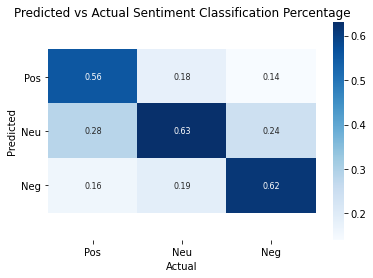

In [6]:
confusion_matrix_heat_map(log_classifier, tf_idf_data_test, y_test)